In [ ]:
# Problem is to increase upfront pricing accuracy.
# To do that, we need to check current accuracy, and what makes the upfront pricing differs from metered price.

# first, let's look at the data.

# import libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("C:/Users/jisu7/Downloads/Test.csv - test.csv")
data.head()

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
0,22,22,2020-02-02 3:37:31,4.04,10.0,2839,700,1,client,finished,...,NaN,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0
1,618,618,2020-02-08 2:26:19,6.09,3.6,5698,493,1,client,finished,...,NaN,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,NaN
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,...,NaN,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0
3,313,313,2020-02-05 6:34:54,72871.72,NaN,49748,1400,0,client,finished,...,NaN,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,...,NaN,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,NaN


In [ ]:
data.info()
# the data have total 4943 incidence with 3409 upfront pricing.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4943 entries, 0 to 4942
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id_new           4943 non-null   int64  
 1   order_try_id_new       4943 non-null   int64  
 2   calc_created           4943 non-null   object 
 3   metered_price          4923 non-null   float64
 4   upfront_price          3409 non-null   float64
 5   distance               4943 non-null   int64  
 6   duration               4943 non-null   int64  
 7   gps_confidence         4943 non-null   int64  
 8   entered_by             4943 non-null   object 
 9   b_state                4943 non-null   object 
 10  dest_change_number     4943 non-null   int64  
 11  prediction_price_type  4923 non-null   object 
 12  predicted_distance     4923 non-null   float64
 13  predicted_duration     4923 non-null   float64
 14  change_reason_pricing  298 non-null    object 
 15  tick

In [ ]:
# fill na for change reason pricing
data.fillna({'change_reason_pricing':'NA'}, inplace=True)
data.fillna({'fraud_score':0}, inplace=True)
# null값 확인
data.isnull().sum()

order_id_new                0
order_try_id_new            0
calc_created                0
metered_price              20
upfront_price            1534
distance                    0
duration                    0
gps_confidence              0
entered_by                  0
b_state                     0
dest_change_number          0
prediction_price_type      20
predicted_distance         20
predicted_duration         20
change_reason_pricing       0
ticket_id_new               0
device_token             4943
rider_app_version          16
order_state                 0
order_try_state             0
driver_app_version          0
driver_device_uid_new       0
device_name                 0
eu_indicator                0
overpaid_ride_ticket        0
fraud_score                 0
dtype: int64

In [ ]:
# First of all, want to know what portion of incidence is beyond acceptable range of +-20% of upfront price.
# Acceptance shows if the incidence is within the acceptable upfront range
data_new = data.drop('device_token', axis = 1) # drop device_token column since there's no data
data_new = data_new.dropna(subset=['metered_price'])
data_new['metered_upfront_ratio'] = data['metered_price']/data['upfront_price']
data_new['date'] = pd.to_datetime(data['calc_created'])
data_new['hour'] = data_new['date'].dt.hour
data_new['upfront_low'] = data['upfront_price']*0.8
data_new['upfront_high'] = data['upfront_price']*1.2
data_new['Acceptance'] = np.where((data_new['metered_price']>=data_new['upfront_low'])
                                      &(data_new['metered_price']<=data_new['upfront_high']), 1, 0)
data_new.head()


,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,device_name,eu_indicator,overpaid_ride_ticket,fraud_score,metered_upfront_ratio,date,hour,upfront_low,upfront_high,Acceptance
0,22,22,2020-02-02 3:37:31,4.04,10.0,2839,700,1,client,finished,...,Xiaomi Redmi 6,1,0,-1383.0,0.404000,2020-02-02 03:37:31,3,8.00,12.00,0
1,618,618,2020-02-08 2:26:19,6.09,3.6,5698,493,1,client,finished,...,Samsung SM-G965F,1,0,0.0,1.691667,2020-02-08 02:26:19,2,2.88,4.32,0
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,...,Samsung SM-A530F,1,0,-166.0,1.234286,2020-02-08 11:50:35,11,2.80,4.20,0
3,313,313,2020-02-05 6:34:54,72871.72,NaN,49748,1400,0,client,finished,...,TECNO-Y6,0,1,0.0,NaN,2020-02-05 06:34:54,6,NaN,NaN,0
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,...,Itel W5504,0,0,0.0,1.027308,2020-02-13 17:31:24,17,15600.00,23400.00,1


In [ ]:
# To calculate acceptance rate, I will only consider 3409 samples with upfront_price
df_upfront= data_new.dropna(subset=['upfront_price'])
df_upfront.describe()

,order_id_new,order_try_id_new,metered_price,upfront_price,distance,duration,gps_confidence,dest_change_number,predicted_distance,predicted_duration,ticket_id_new,driver_device_uid_new,eu_indicator,overpaid_ride_ticket,fraud_score,metered_upfront_ratio,hour,upfront_low,upfront_high,Acceptance
count,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000,3409.000000
mean,1773.188325,1773.187445,4999.300109,4160.095747,8971.718979,1245.337342,0.890877,1.060428,8436.150191,1007.584042,2380.285714,1083.474039,0.741273,0.031681,-396.858610,1.186509,12.716046,3328.076597,4992.114896,0.542094
std,1213.856791,1213.857018,14306.060449,17015.711912,9882.407374,1311.288049,0.311839,0.356673,10972.320329,802.115433,1279.625735,637.826874,0.438000,0.175175,937.513702,0.681021,6.440481,13612.569529,20418.854294,0.498298
min,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,21.000000,2.000000,0.000000,0.000000,0.000000,0.000000,-14225.000000,0.022996,0.000000,1.600000,2.400000,0.000000
25%,742.000000,742.000000,4.460000,4.200000,3629.000000,537.000000,1.000000,1.000000,3873.000000,552.000000,1445.000000,528.000000,0.000000,0.000000,-364.000000,0.957333,8.000000,3.360000,5.040000,0.000000
50%,1507.000000,1507.000000,7.370000,6.600000,6549.000000,895.000000,1.000000,1.000000,6365.000000,839.000000,2341.000000,1090.000000,1.000000,0.000000,-10.000000,1.044160,13.000000,5.280000,7.920000,1.000000
75%,2794.000000,2794.000000,2033.300000,4000.000000,11203.000000,1447.000000,1.000000,1.000000,10306.000000,1248.000000,3263.000000,1652.000000,1.000000,0.000000,0.000000,1.271053,18.000000,3200.000000,4800.000000,1.000000
max,4165.000000,4165.000000,194483.520000,595000.000000,171119.000000,18734.000000,1.000000,7.000000,353538.000000,20992.000000,4938.000000,2158.000000,1.000000,1.000000,49.000000,12.547324,23.000000,476000.000000,714000.000000,1.000000


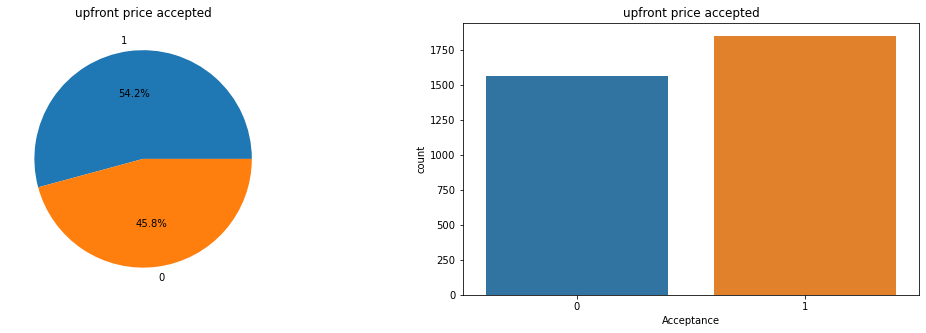

In [ ]:
df_upfront['Acceptance'].value_counts(normalize=True)

f,ax = plt.subplots(1,2,figsize=(18,5))
df_upfront['Acceptance'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('upfront price accepted')
ax[0].set_ylabel('')
sns.countplot('Acceptance', data=df_upfront, ax=ax[1])
ax[1].set_title('upfront price accepted')
plt.show()
#only 54.2% of upfront price is within +-20% of metered price

In [ ]:
#Analyze with Category data #1_destination change
df_upfront.groupby(['change_reason_pricing','Acceptance'])['Acceptance'].count()

change_reason_pricing       Acceptance
NA                          0             1537
                            1             1840
client_destination_changed  0               24
                            1                8
Name: Acceptance, dtype: int64

% of incidence 'without destination change' for upfront pricing Accepted incidence: 0.5448623038199586
% of incidence 'with destination change' for upfront pricing Accepted incidence: 0.25


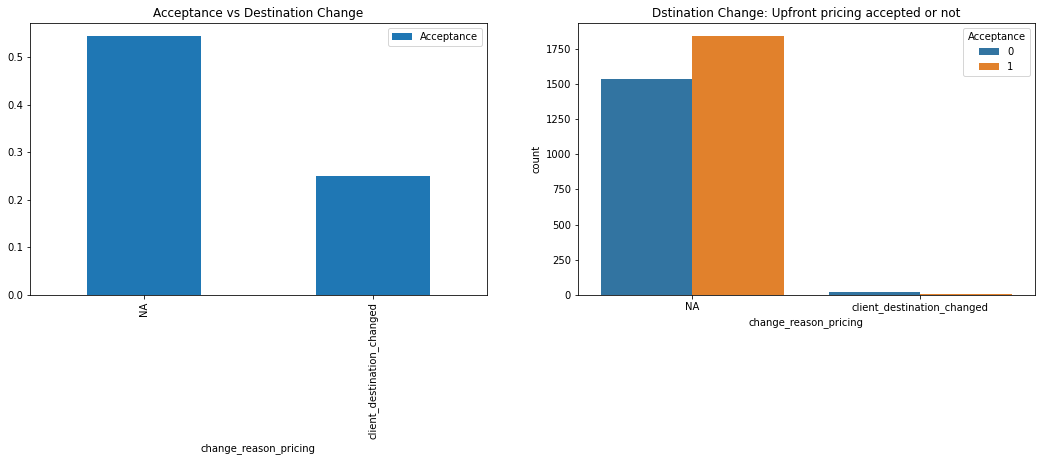

In [ ]:
#by change of destination
no_change = df_upfront.loc[df_upfront.change_reason_pricing == 'NA']["Acceptance"]
rate_no_change = sum(no_change)/len(no_change)

print("% of incidence 'without destination change' for upfront pricing Accepted incidence:", rate_no_change)

dest_change = df_upfront.loc[df_upfront.change_reason_pricing == 'client_destination_changed']["Acceptance"]
rate_change = sum(dest_change)/len(dest_change)

print("% of incidence 'with destination change' for upfront pricing Accepted incidence:", rate_change)

f,ax=plt.subplots(1,2,figsize=(18,5))
df_upfront[['change_reason_pricing','Acceptance']].groupby(['change_reason_pricing']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Acceptance vs Destination Change')
sns.countplot('change_reason_pricing',hue='Acceptance',data=df_upfront,ax=ax[1])
ax[1].set_title('Dstination Change: Upfront pricing accepted or not')
plt.show()

# when destination changed by client, only 25% of the incidence priced within the acceptance rate.
# However the number of destination changed incidence was only 32, which is not big enough to affect entire acceptance rate.
# Acceptance rate of destination not changed incidence is 54.49% which is still very close to 54.2% of total incidence.


In [ ]:
# But for further analysis, i will exlude incidence with destination change.
conditions = (df_upfront['change_reason_pricing']=='NA')
df_original = df_upfront[conditions]
df_original['pdist_ratio'] = df_original['distance']/df_original['predicted_distance']
df_original['pdura_ratio'] = df_original['duration']/df_original['predicted_duration']
df_original.describe()

,order_id_new,order_try_id_new,metered_price,upfront_price,distance,duration,gps_confidence,dest_change_number,predicted_distance,predicted_duration,...,eu_indicator,overpaid_ride_ticket,fraud_score,metered_upfront_ratio,hour,upfront_low,upfront_high,Acceptance,pdist_ratio,pdura_ratio
count,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,...,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000
mean,1782.187444,1782.185372,4800.382102,3763.034172,8898.023690,1224.698549,0.893100,1.048268,8252.641694,990.155167,...,0.748297,0.031389,-400.519988,1.184877,12.699733,3010.427338,4515.641007,0.544862,1.165721,1.288418
std,1215.183125,1215.184116,14091.597212,13330.682533,9772.990262,1259.524827,0.309031,0.331561,9172.289571,711.204363,...,0.434056,0.174392,941.170706,0.673922,6.447875,10664.546027,15996.819040,0.498057,1.342186,1.211761
min,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,21.000000,2.000000,...,0.000000,0.000000,-14225.000000,0.039976,0.000000,1.600000,2.400000,0.000000,0.000000,0.000000
25%,748.000000,748.000000,4.450000,4.200000,3600.000000,534.000000,1.000000,1.000000,3855.000000,549.000000,...,0.000000,0.000000,-372.000000,0.958025,8.000000,3.360000,5.040000,0.000000,0.951174,0.881481
50%,1516.000000,1516.000000,7.290000,6.600000,6531.000000,892.000000,1.000000,1.000000,6323.000000,835.000000,...,1.000000,0.000000,-10.000000,1.043902,13.000000,5.280000,7.920000,1.000000,1.027605,1.065543
75%,2802.000000,2802.000000,2000.000000,2000.000000,11127.000000,1429.000000,1.000000,1.000000,10206.000000,1231.000000,...,1.000000,0.000000,0.000000,1.269841,18.000000,1600.000000,2400.000000,1.000000,1.277148,1.414286
max,4165.000000,4165.000000,194483.520000,438000.000000,171119.000000,16266.000000,1.000000,7.000000,258459.000000,18321.000000,...,1.000000,1.000000,49.000000,12.547324,23.000000,350400.000000,525600.000000,1.000000,58.898833,26.000000


<AxesSubplot:>

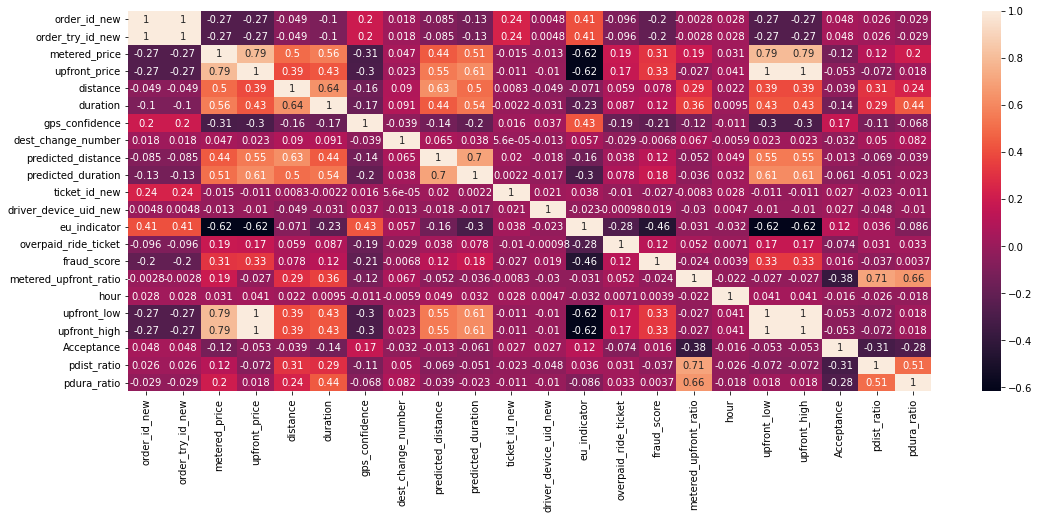

In [ ]:
#correlation
corr = df_original.corr(method='kendall')
plt.figure(figsize=(18,7))
sns.heatmap(corr, annot=True)
#

<AxesSubplot:xlabel='predicted_duration', ylabel='duration'>

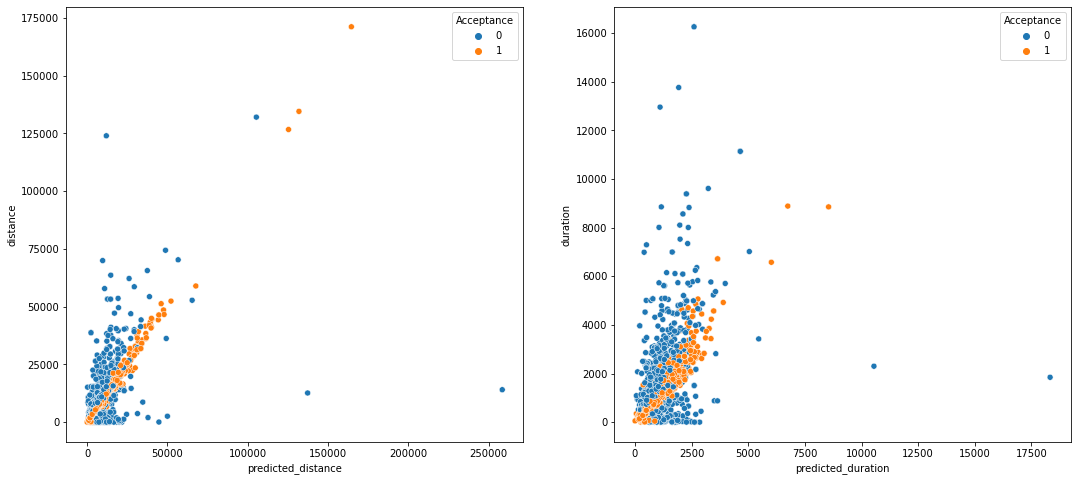

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.scatterplot(data=df_original, x = 'predicted_distance', y='distance', hue = 'Acceptance', ax=ax[0])
sns.scatterplot(data=df_original, x = 'predicted_duration', y='duration', hue = 'Acceptance', ax=ax[1])

# there's room for improvement for prediction on distance and especially on duration
# a lot of cases showing longer duration than predicted

In [ ]:
#Analyze with Category data #2_gps_confidence

df_original.groupby(['gps_confidence','Acceptance'])['Acceptance'].count()

gps_confidence  Acceptance
0               0              251
                1              110
1               0             1286
                1             1730
Name: Acceptance, dtype: int64

% of incidence with gps confidence for upfront pricing Accepted: 0.5736074270557029
% of incidence without gps confidence for upfront pricing Accepted: 0.3047091412742382


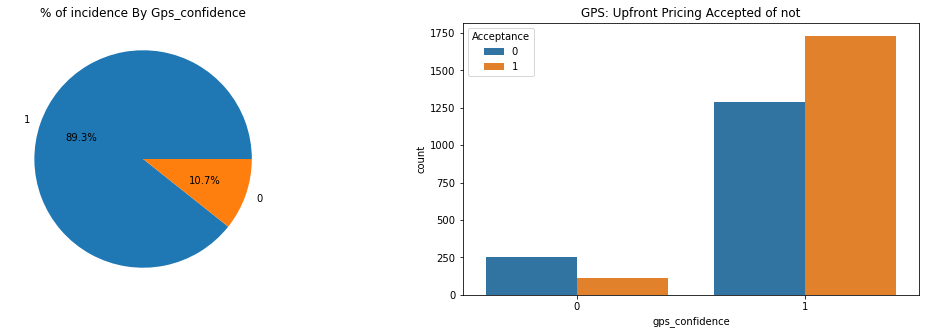

In [ ]:
gps = df_original.loc[df_original.gps_confidence == 1]["Acceptance"]
rate_gps = sum(gps)/len(gps)
print("% of incidence with gps confidence for upfront pricing Accepted:", rate_gps)

no_gps = df_original.loc[df_original.gps_confidence == 0]["Acceptance"]
rate_no_gps = sum(no_gps)/len(no_gps)

print("% of incidence without gps confidence for upfront pricing Accepted:", rate_no_gps)


f,ax = plt.subplots(1,2,figsize=(18,5))
df_original['gps_confidence'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('% of incidence By Gps_confidence')
ax[0].set_ylabel('')
sns.countplot('gps_confidence', hue='Acceptance', data=df_original, ax=ax[1])
ax[1].set_title('GPS: Upfront Pricing Accepted of not')
plt.show()

# About 10.7 % of incidence show lack of gps_confidence. accentance of upfront pricing for this category is only 30%
# with GPS confidence, upfront pricing accepted increased by +0.3%p to 57.36%

driver_app_version,DA.4.10,DA.4.12,DA.4.14,DA.4.16,DA.4.19,DA.4.22,DA.4.23,DA.4.29,DA.4.30,DA.4.31,DA.4.32,DA.4.33,DA.4.34,DA.4.35,DA.4.37,DA.4.38,DA.4.39,DA.4.41,DA.4.42,DI.3.21,DI.3.26,DI.3.28,DI.3.30,DI.3.31,DI.3.32,DI.3.33,DI.3.34,DI.3.35,DI.3.36,DI.3.37,DI.3.38,DI.3.39,All
Acceptance,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,22,3,5,17,12,0,7,3,20,113,0,3,94,37,368,1,422,43,209,0,3,0,0,8,6,39,48,1,32,6,0,15,1537
1,5,2,9,9,1,3,7,4,12,114,1,1,112,23,401,2,610,80,249,3,1,3,1,5,7,57,43,1,47,10,2,15,1840
All,27,5,14,26,13,3,14,7,32,227,1,4,206,60,769,3,1032,123,458,3,4,3,1,13,13,96,91,2,79,16,2,30,3377


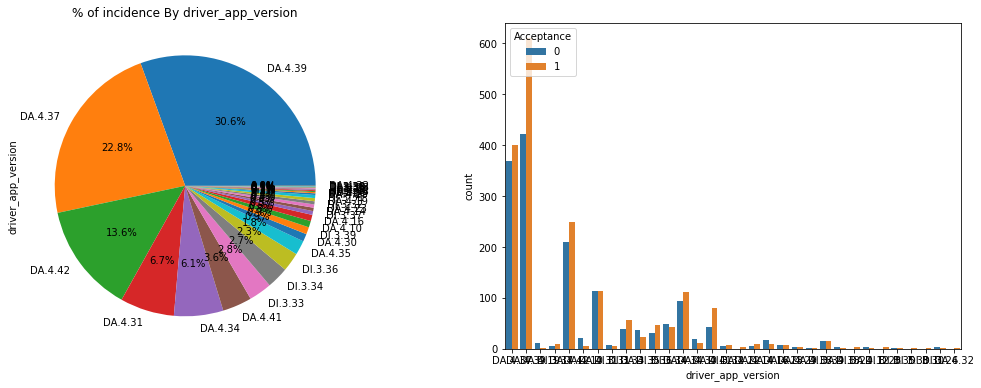

In [ ]:
#driver app version
f,ax = plt.subplots(1,2,figsize=(18,6))
df_original['driver_app_version'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('% of incidence By driver_app_version')
sns.countplot('driver_app_version', hue='Acceptance', data=df_original, ax=ax[1])

pd.crosstab(df_original.Acceptance,df_original.driver_app_version,margins=True).style.background_gradient(cmap='summer_r')

# Top 5 driver app version, DA4.39, DA4.37, DA4.42, DA4.31, and DA4.34, is taking almost 80% of incidence
# Among those versions, DA4.37 shows acceptance rate of below average. (51.6%)
# while 4.39 shows that of 58.8% ==> encourage drivers to use latest version, those versions shows higher gps confidence rate as well.
# Especially, gps_confidence rate of 4.37 was lower than other versions (especially for TECNO)

In [ ]:
df_original.groupby('driver_app_version')['Acceptance'].describe().reset_index()

,driver_app_version,count,mean,std,min,25%,50%,75%,max
0,DA.4.10,27.0,0.185185,0.395847,0.0,0.00,0.0,0.00,1.0
1,DA.4.12,7.0,0.428571,0.534522,0.0,0.00,0.0,1.00,1.0
2,DA.4.14,15.0,0.600000,0.507093,0.0,0.00,1.0,1.00,1.0
3,DA.4.16,26.0,0.346154,0.485165,0.0,0.00,0.0,1.00,1.0
4,DA.4.19,13.0,0.076923,0.277350,0.0,0.00,0.0,0.00,1.0
5,DA.4.22,3.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
6,DA.4.23,14.0,0.500000,0.518875,0.0,0.00,0.5,1.00,1.0
7,DA.4.29,7.0,0.571429,0.534522,0.0,0.00,1.0,1.00,1.0
8,DA.4.30,32.0,0.375000,0.491869,0.0,0.00,0.0,1.00,1.0
9,DA.4.31,227.0,0.502203,0.501100,0.0,0.00,1.0,1.00,1.0


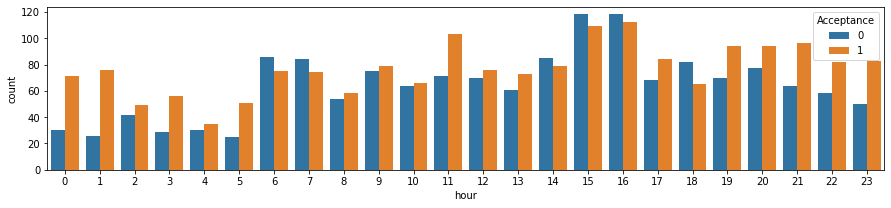

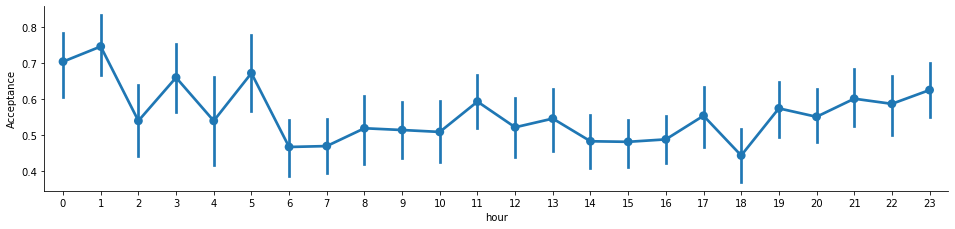

In [ ]:
sns.countplot('hour',hue='Acceptance',data=df_original)
fig=plt.gcf()
fig.set_size_inches(15,3)

sns.factorplot('hour','Acceptance',data=df_original)
fig=plt.gcf()
fig.set_size_inches(15,3)
plt.show()
# accentance rate go low between 6am to 6pm

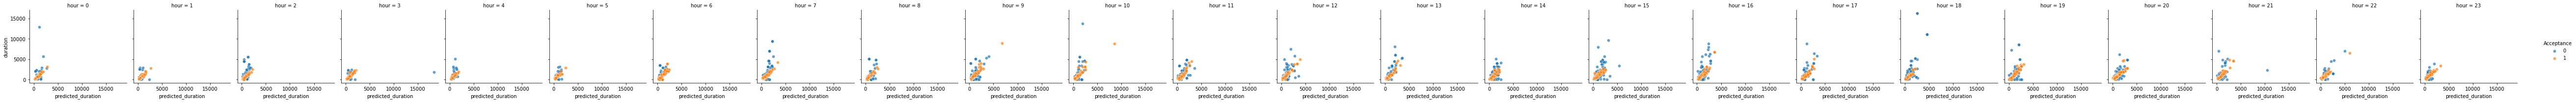

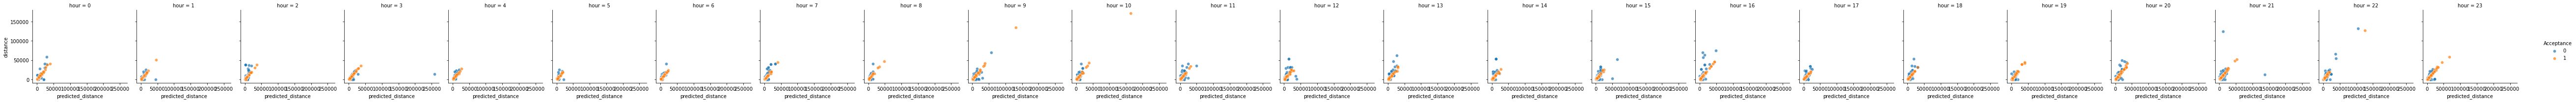

In [ ]:
g = sns.FacetGrid(df_original, col='hour', hue='Acceptance')
g.map(sns.scatterplot,'predicted_duration', 'duration', alpha=.7)
g.add_legend()

g = sns.FacetGrid(df_original, col='hour', hue='Acceptance')
g.map(sns.scatterplot, 'predicted_distance', 'distance', alpha=.7)
g.add_legend()

% of incidence within EU for upfront pricing Accepted: 0.5793430945785516
% of incidence Outside EU for upfront pricing Accepted: 0.4423529411764706


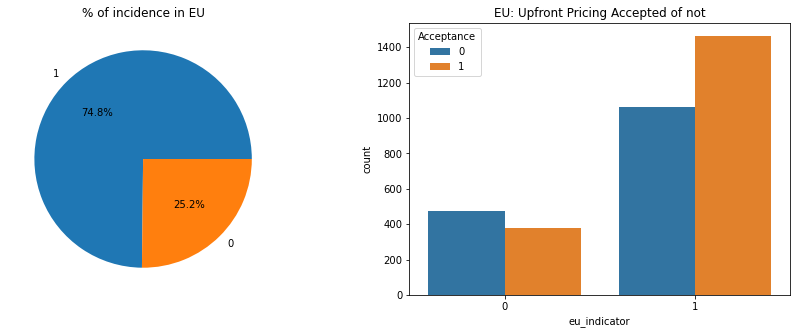

In [ ]:
# eu_indicator
eu = df_original.loc[df_original.eu_indicator == 1]["Acceptance"]
rate_eu = sum(eu)/len(eu)
print("% of incidence within EU for upfront pricing Accepted:", rate_eu)

no_eu = df_original.loc[df_original.eu_indicator == 0]["Acceptance"]
rate_no_eu = sum(no_eu)/len(no_eu)

print("% of incidence Outside EU for upfront pricing Accepted:", rate_no_eu)


f,ax = plt.subplots(1,2,figsize=(15,5))
df_original['eu_indicator'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('% of incidence in EU')
ax[0].set_ylabel('')
sns.countplot('eu_indicator', hue='Acceptance', data=df_original, ax=ax[1])
ax[1].set_title('EU: Upfront Pricing Accepted of not')
plt.show()

% gps confidence inside EU: 0.9703205381875742
% gps confidence outside EU: 0.6635294117647059


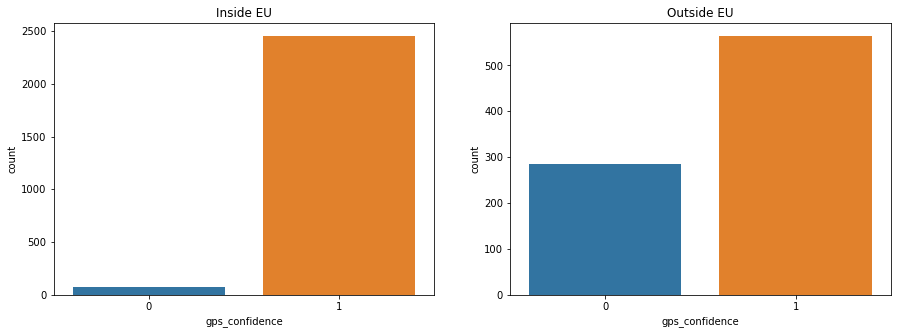

In [ ]:
eu_gps = df_original.loc[df_original.eu_indicator == 1]["gps_confidence"]
eu_gps_rate = sum(eu_gps)/len(eu_gps)
print("% gps confidence inside EU:", eu_gps_rate)
out_gps = df_original.loc[df_original.eu_indicator == 0]["gps_confidence"]
out_gps_rate = sum(out_gps)/len(out_gps)
print("% gps confidence outside EU:", out_gps_rate)


f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(df_original[df_original['eu_indicator']==1].gps_confidence,ax=ax[0])
ax[0].set_title('Inside EU')
sns.countplot(df_original[df_original['eu_indicator']==0].gps_confidence,ax=ax[1])
ax[1].set_title('Outside EU')
plt.show()
# lack of GPS confidence outside of EU could have affect on the pricing.

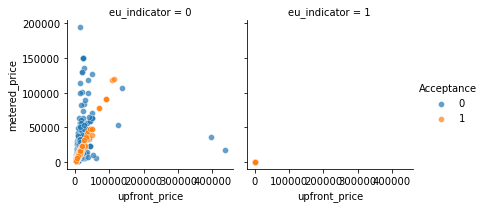

In [ ]:
g = sns.FacetGrid(df_original, col='eu_indicator', hue='Acceptance')
g.map(sns.scatterplot,'upfront_price', 'metered_price', alpha=.7)
g.add_legend()



<AxesSubplot:xlabel='eu_indicator', ylabel='count'>

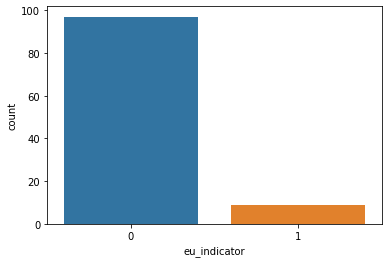

In [ ]:
# over 90% of overpaid ride ticket issued rides outside of EU
sns.countplot(df_original[df_original['overpaid_ride_ticket']==1].eu_indicator)